In [56]:
import numpy as np
import matplotlib.pyplot as plt

In [57]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
x = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in xrange(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  x[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j

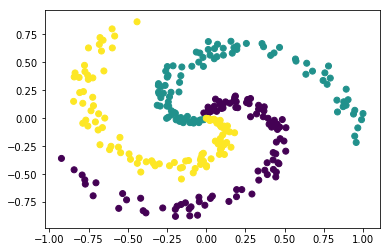

In [58]:
plt.scatter(x[:,0],x[:,1],c=y)

In [59]:
from sklearn.linear_model import LogisticRegressionCV
lrreg = LogisticRegressionCV()
lrreg.fit(x,y)
z = lrreg.predict(x)

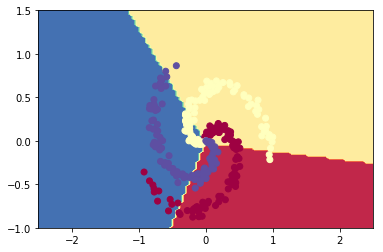

In [60]:
def ClassifierPlot(model,x,y):
    x1 = np.linspace(-2.5,2.5,100)
    x2 = np.linspace(-1,1.5,100)
    xx1,xx2 = np.meshgrid(x1,x2)
    inputx = np.array([np.ravel(xx1),np.ravel(xx2)]).T
    z = model.predict(inputx).reshape(xx1.shape)
    plt.contourf(xx1,xx2,z,cmap=plt.cm.Spectral)
    plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.Spectral)

ClassifierPlot(lrreg,x,y)

In [61]:
x=x.T

In [72]:
def initiation(hiddenlayerlen):
    param = {}
    np.random.seed(0)
    w1 = np.random.randn(hiddenlayerlen,x.shape[0])
    b1 = np.zeros([hiddenlayerlen,1])
    w2 = np.random.randn(3,hiddenlayerlen)
    b2 = np.zeros([3,1])
    param = {'w1':w1,'b1':b1,'w2':w2,'b2':b2}
    return param

In [73]:
x.shape

(2, 300)

In [123]:
def modelling(x,y,hiddenlayerlen=3,passes = 10):
    param = initiation(hiddenlayerlen)
    w1 = param['w1']
    b1 = param['b1']
    w2 = param['w2']
    b2 = param['b2']

    for i in range(0,passes):
        z1 = w1.dot(x)+b1
        a1 = np.tanh(z1)
        z2 = w2.dot(a1)+b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=0, keepdims=True)


        #dz2 = probs[y,range(x.shape[1])]-1
        dz2 = probs
        dz2[y,range(x.shape[1])] -= 1
        
        dw2 = dz2.dot(a1.T)/300
        db2 = np.sum(dz2,axis=1,keepdims=True)/300
        
        dz1 = w2.T.dot(dz2)*(1-np.power(a1,2))
       
        dw1 = dz1.dot(x.T)/300
        db1 = np.sum(dz1,axis=1,keepdims=True)/300

        w1 += - 0.01*dw1
        b1 += - 0.01*db1
        w2 += - 0.01*dw2
        b2 += - 0.01*db2
        model = {'w1':w1,'b1':b1,'w2':w2,'b2':b2}
    return model

In [124]:
def predict(model,q):
    z1 = model['w1'].dot(q)+model['b1']
    a1 = np.tanh(z1)
    z2 = model['w2'].dot(a1)+model['b2']
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=0, keepdims=True)
    a2 = np.argmax(probs,axis=0)
    return a2

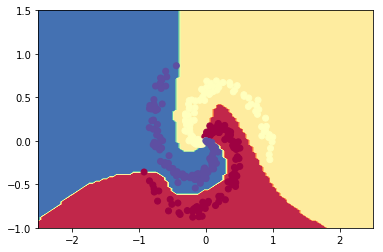

In [125]:
x1 = np.linspace(-2.5,2.5,100)
x2 = np.linspace(-1,1.5,100)
xx1,xx2 = np.meshgrid(x1,x2)
inputx = np.array([np.ravel(xx1),np.ravel(xx2)])
z = predict(modelling(x,y,20,20000),inputx).reshape(xx1.shape)
plt.contourf(xx1,xx2,z,cmap=plt.cm.Spectral)
plt.scatter(x[0,:],x[1,:],c=y,cmap=plt.cm.Spectral)

In [118]:
y_h = predict(modelling(x,y,100,20000),x)

In [119]:
float(np.sum(y_h==y))/300

0.97